In [149]:
import pandas as pd
import cv2 
import matplotlib.pyplot as plt

In [150]:
img_path = 'res/Images/'
variant = ord('D') % 5 + 1
# variant = 4
print(f'My variant: {variant}')

My variant: 4


In [151]:
data = pd.read_excel('res/lab6.xlsx').iloc[variant - 1]
data

N                             4
file name        longbottom.jpg
image size              600x600
glasses color           magenta
line width                    5
Name: 3, dtype: object

In [152]:
def parse_color(color: str):
    if color == 'red':
        return (255, 0, 0)
    elif color == 'blue':
        return (0, 0, 255)
    elif color == 'cian':
        return (0, 255, 255)
    elif color == 'magenta':
        return (255, 0, 255)
    elif color == 'yellow':
        return (255, 255, 0)
    else:
        # Handle the case where the color is not recognized
        return None  # or raise an exception

color = parse_color(data['glasses color'])
line_width = data['line width']
print(color, line_width)


(255, 0, 255) 5


In [153]:
img = cv2.imread(img_path + data['file name'])
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [154]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
)

In [155]:
face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

In [156]:
eyes_features = []

for (x, y, w, h) in face:    
    roi_gray = gray_image[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    
    eyes = eye_cascade.detectMultiScale(
        roi_gray, 
        scaleFactor=1.1, minNeighbors=5,
        minSize=(60, 60)
    )
    for (ex, ey, ew, eh) in eyes:
        eyes_features.append((ex, ey, ew, eh))
    
radius = sum(
    eyes_features[0][2:4] + eyes_features[1][2:4]
) // 8
cv2.circle(
    roi_color,
    (
        eyes_features[0][0] + eyes_features[0][2] // 2,
        eyes_features[0][1] + eyes_features[0][3] // 2
    ),
    radius, color, line_width
)
cv2.circle(
    roi_color,
    (
        eyes_features[1][0] + eyes_features[1][2] // 2,
        eyes_features[1][1] + eyes_features[1][3] // 2
    ),
    radius, color, line_width
)
cv2.line(
    roi_color,
    (
        eyes_features[0][0] + eyes_features[0][2] // 2 + radius,
        eyes_features[0][1] + eyes_features[0][3] // 2
    ),
    (
        eyes_features[1][0] + eyes_features[1][2] // 2 - radius,
        eyes_features[1][1] + eyes_features[1][3] // 2
    ),
    color, line_width
)
cv2.line(
    roi_color,
    (
        eyes_features[0][0] + eyes_features[0][2] // 2 - radius,
        eyes_features[0][1] + eyes_features[0][3] // 2
    ),
    (
        eyes_features[0][0] + eyes_features[0][2] // 2 - radius * 2,
        eyes_features[0][1] + eyes_features[0][3] // 2
    ),
    color, line_width
)
cv2.line(
    roi_color,
    (
        eyes_features[1][0] + eyes_features[1][2] // 2 + radius,
        eyes_features[1][1] + eyes_features[1][3] // 2
    ),
    (
        eyes_features[1][0] + eyes_features[1][2] // 2 + radius * 2,
        eyes_features[1][1] + eyes_features[1][3] // 2
    ),
    color, line_width
)
    

    

array([[[25, 35, 65],
        [16, 26, 56],
        [ 7, 15, 44],
        ...,
        [64, 66, 77],
        [64, 66, 77],
        [60, 62, 73]],

       [[22, 31, 64],
        [17, 25, 55],
        [15, 23, 52],
        ...,
        [68, 71, 85],
        [68, 72, 83],
        [65, 67, 78]],

       [[25, 31, 66],
        [17, 22, 55],
        [20, 26, 55],
        ...,
        [66, 73, 88],
        [68, 74, 87],
        [69, 72, 86]],

       ...,

       [[ 9,  5, 10],
        [ 9,  6,  8],
        [ 8,  5,  7],
        ...,
        [ 5,  7, 25],
        [ 5,  7, 25],
        [ 6,  5, 25]],

       [[ 9,  5, 10],
        [ 9,  6,  8],
        [ 8,  5,  7],
        ...,
        [ 5,  7, 25],
        [ 5,  7, 25],
        [ 6,  5, 25]],

       [[ 9,  5, 10],
        [ 9,  6,  8],
        [ 9,  6,  8],
        ...,
        [ 4,  6, 24],
        [ 4,  6, 24],
        [ 7,  6, 26]]], dtype=uint8)

(-0.5, 614.5, 923.5, -0.5)

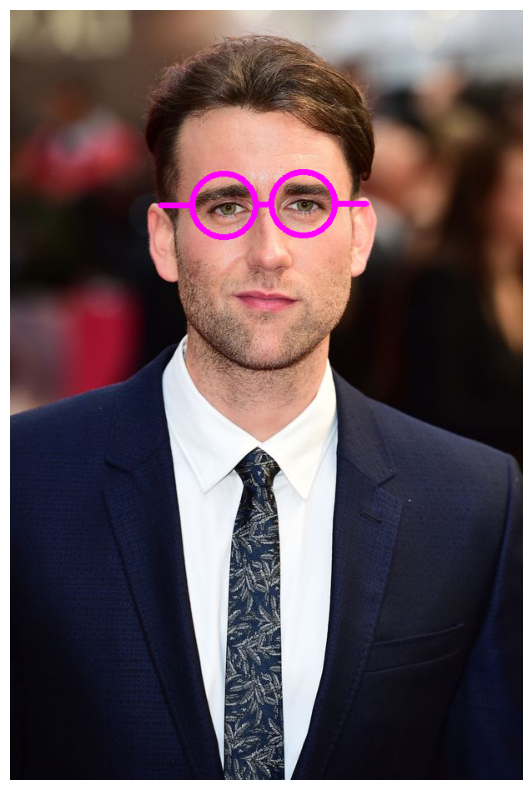

In [157]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
scale_percent = 70
width = int(img_rgb.shape[1] * scale_percent / 100)
height = int(img_rgb.shape[0] * scale_percent / 100)
dim = (width, height)

plt.figure(figsize=(20, 10))
plt.imshow(img_rgb)
plt.axis('off')

(-0.5, 282.5, 282.5, -0.5)

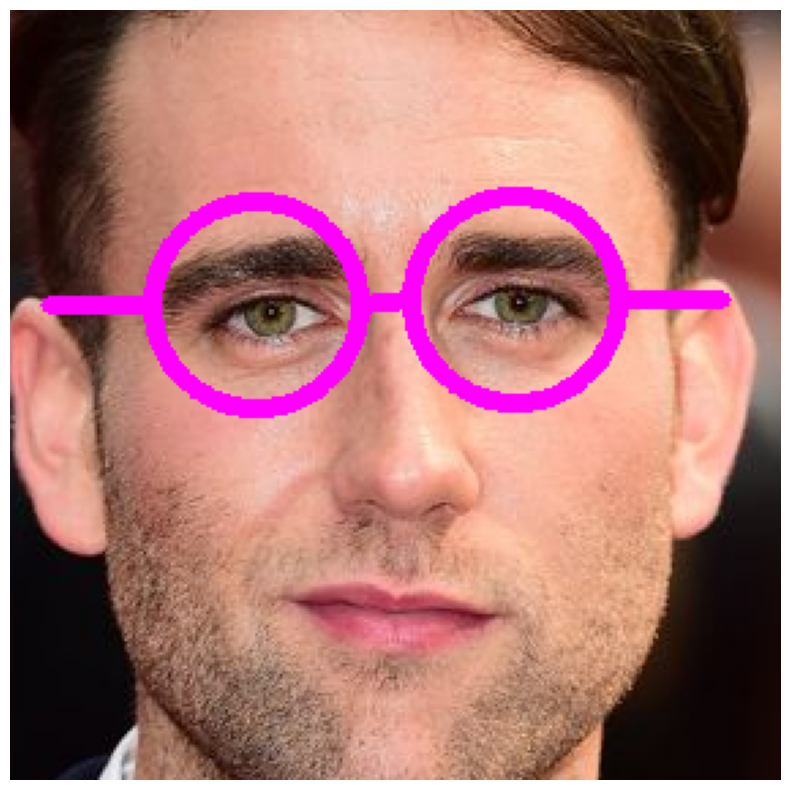

In [158]:
roi_color = cv2.cvtColor(roi_color, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 10))
plt.imshow(roi_color)
plt.axis('off')

(0, 0, 255) 3


(-0.5, 228.5, 228.5, -0.5)

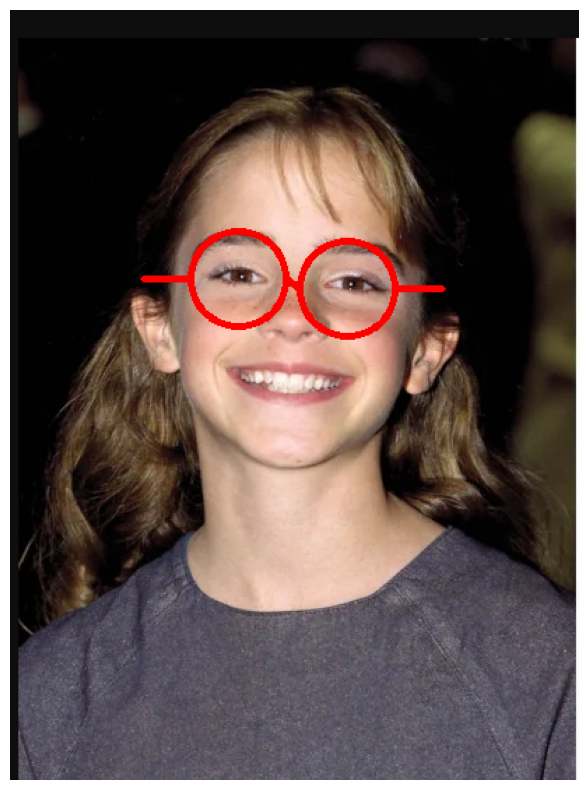

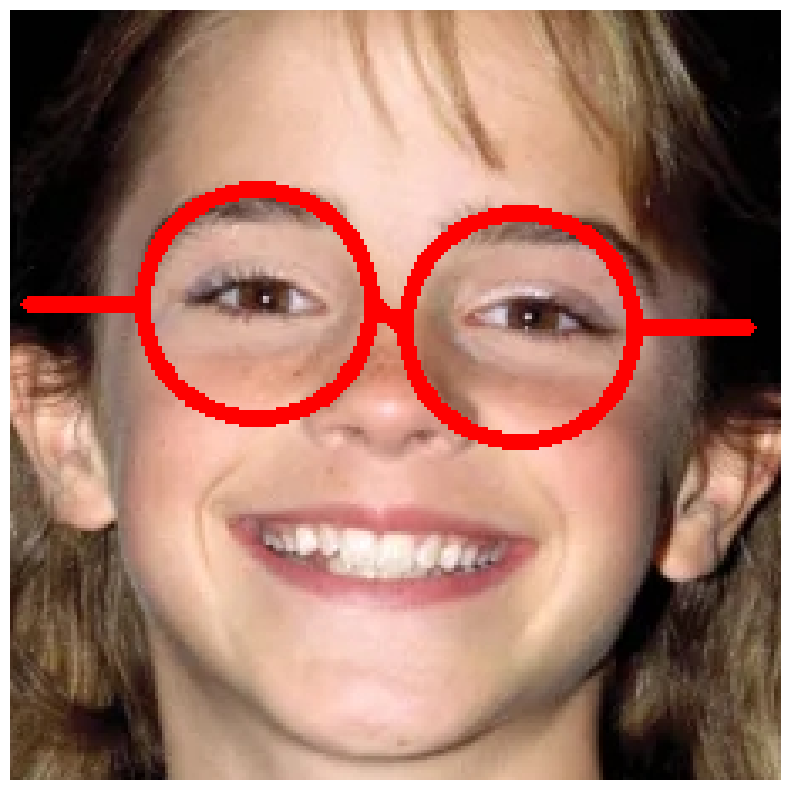

In [159]:
#Test with others
data = pd.read_excel('res/lab6.xlsx').iloc[1]

def parse_color(color: str):
    if color == 'red':
        return (255, 0, 0)
    elif color == 'blue':
        return (0, 0, 255)
    elif color == 'cian':
        return (0, 255, 255)
    elif color == 'magenta':
        return (255, 0, 255)
    elif color == 'yellow':
        return (255, 255, 0)
    else:
        # Handle the case where the color is not recognized
        return None  # or raise an exception

color = parse_color(data['glasses color'])
line_width = data['line width']
print(color, line_width)

img = cv2.imread(img_path + data['file name'])
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
)

face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

eyes_features = []

for (x, y, w, h) in face:    
    roi_gray = gray_image[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    
    eyes = eye_cascade.detectMultiScale(
        roi_gray, 
        scaleFactor=1.1, minNeighbors=5,
        minSize=(60, 60)
    )
    for (ex, ey, ew, eh) in eyes:
        eyes_features.append((ex, ey, ew, eh))
    
radius = sum(
    eyes_features[0][2:4] + eyes_features[1][2:4]
) // 8
cv2.circle(
    roi_color,
    (
        eyes_features[0][0] + eyes_features[0][2] // 2,
        eyes_features[0][1] + eyes_features[0][3] // 2
    ),
    radius, color, line_width
)
cv2.circle(
    roi_color,
    (
        eyes_features[1][0] + eyes_features[1][2] // 2,
        eyes_features[1][1] + eyes_features[1][3] // 2
    ),
    radius, color, line_width
)
cv2.line(
    roi_color,
    (
        eyes_features[0][0] + eyes_features[0][2] // 2 + radius,
        eyes_features[0][1] + eyes_features[0][3] // 2
    ),
    (
        eyes_features[1][0] + eyes_features[1][2] // 2 - radius,
        eyes_features[1][1] + eyes_features[1][3] // 2
    ),
    color, line_width
)
cv2.line(
    roi_color,
    (
        eyes_features[0][0] + eyes_features[0][2] // 2 - radius,
        eyes_features[0][1] + eyes_features[0][3] // 2
    ),
    (
        eyes_features[0][0] + eyes_features[0][2] // 2 - radius * 2,
        eyes_features[0][1] + eyes_features[0][3] // 2
    ),
    color, line_width
)
cv2.line(
    roi_color,
    (
        eyes_features[1][0] + eyes_features[1][2] // 2 + radius,
        eyes_features[1][1] + eyes_features[1][3] // 2
    ),
    (
        eyes_features[1][0] + eyes_features[1][2] // 2 + radius * 2,
        eyes_features[1][1] + eyes_features[1][3] // 2
    ),
    color, line_width
)
    
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
scale_percent = 70
width = int(img_rgb.shape[1] * scale_percent / 100)
height = int(img_rgb.shape[0] * scale_percent / 100)
dim = (width, height)

plt.figure(figsize=(20, 10))
plt.imshow(img_rgb)
plt.axis('off')

roi_color = cv2.cvtColor(roi_color, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 10))
plt.imshow(roi_color)
plt.axis('off')
    



(0, 255, 255) 4


(-0.5, 357.5, 357.5, -0.5)

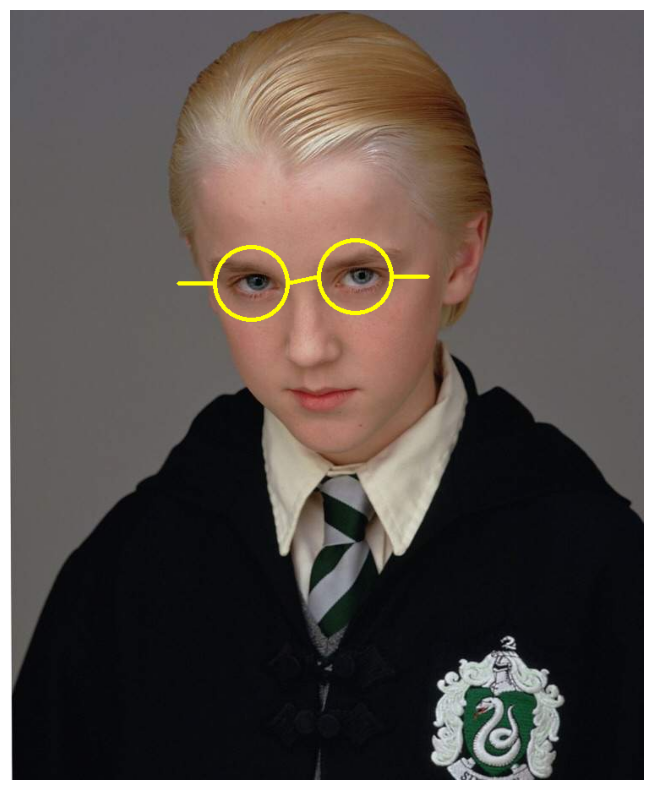

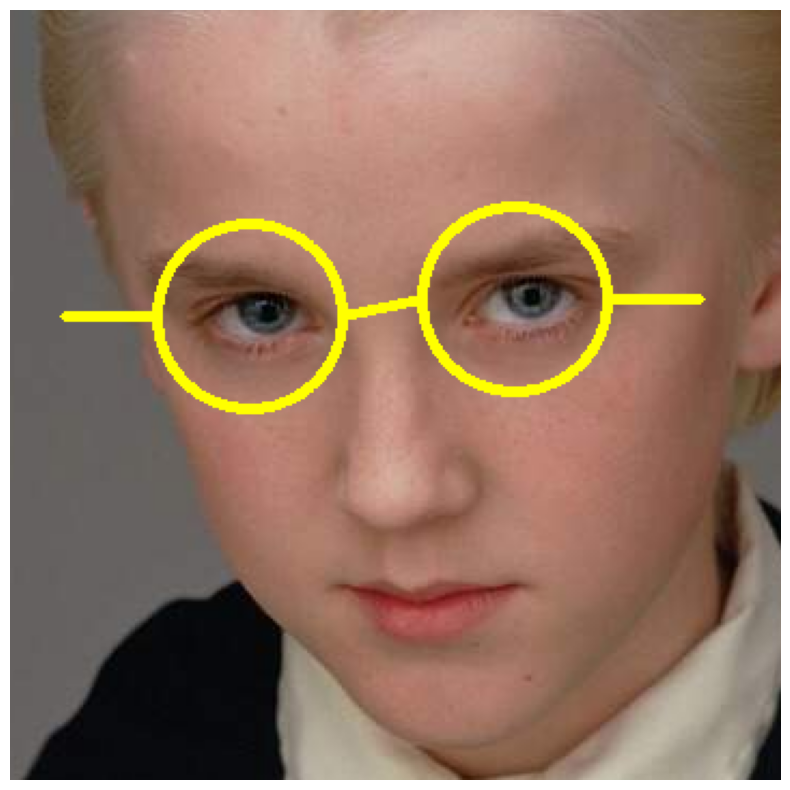

In [160]:
#Test with others
data = pd.read_excel('res/lab6.xlsx').iloc[2]

def parse_color(color: str):
    if color == 'red':
        return (255, 0, 0)
    elif color == 'blue':
        return (0, 0, 255)
    elif color == 'cian':
        return (0, 255, 255)
    elif color == 'magenta':
        return (255, 0, 255)
    elif color == 'yellow':
        return (255, 255, 0)
    else:
        # Handle the case where the color is not recognized
        return None  # or raise an exception

color = parse_color(data['glasses color'])
line_width = data['line width']
print(color, line_width)

img = cv2.imread(img_path + data['file name'])
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
)

face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

eyes_features = []

for (x, y, w, h) in face:    
    roi_gray = gray_image[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    
    eyes = eye_cascade.detectMultiScale(
        roi_gray, 
        scaleFactor=1.1, minNeighbors=5,
        minSize=(60, 60)
    )
    for (ex, ey, ew, eh) in eyes:
        eyes_features.append((ex, ey, ew, eh))
    
radius = sum(
    eyes_features[0][2:4] + eyes_features[1][2:4]
) // 8
cv2.circle(
    roi_color,
    (
        eyes_features[0][0] + eyes_features[0][2] // 2,
        eyes_features[0][1] + eyes_features[0][3] // 2
    ),
    radius, color, line_width
)
cv2.circle(
    roi_color,
    (
        eyes_features[1][0] + eyes_features[1][2] // 2,
        eyes_features[1][1] + eyes_features[1][3] // 2
    ),
    radius, color, line_width
)
cv2.line(
    roi_color,
    (
        eyes_features[0][0] + eyes_features[0][2] // 2 + radius,
        eyes_features[0][1] + eyes_features[0][3] // 2
    ),
    (
        eyes_features[1][0] + eyes_features[1][2] // 2 - radius,
        eyes_features[1][1] + eyes_features[1][3] // 2
    ),
    color, line_width
)
cv2.line(
    roi_color,
    (
        eyes_features[0][0] + eyes_features[0][2] // 2 - radius,
        eyes_features[0][1] + eyes_features[0][3] // 2
    ),
    (
        eyes_features[0][0] + eyes_features[0][2] // 2 - radius * 2,
        eyes_features[0][1] + eyes_features[0][3] // 2
    ),
    color, line_width
)
cv2.line(
    roi_color,
    (
        eyes_features[1][0] + eyes_features[1][2] // 2 + radius,
        eyes_features[1][1] + eyes_features[1][3] // 2
    ),
    (
        eyes_features[1][0] + eyes_features[1][2] // 2 + radius * 2,
        eyes_features[1][1] + eyes_features[1][3] // 2
    ),
    color, line_width
)
    
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
scale_percent = 70
width = int(img_rgb.shape[1] * scale_percent / 100)
height = int(img_rgb.shape[0] * scale_percent / 100)
dim = (width, height)

plt.figure(figsize=(20, 10))
plt.imshow(img_rgb)
plt.axis('off')

roi_color = cv2.cvtColor(roi_color, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 10))
plt.imshow(roi_color)
plt.axis('off')
    

